# K-means Clustering.

### Basics:

K-means es un método de agrupamiento, que tiene como objetivo la partición de un conjunto de n observaciones en k grupos en el que cada observación pertenece al grupo cuyo valor medio es más cercano. Es un método utilizado en minería de datos.

La agrupación del conjunto de datos puede ilustrarse en una partición del espacio de datos en **celdas de Voronoi**.

_Celdas de Vornoi_: Los Diagramas de Voronoi son uno de los métodos de interpolación más simples, basados en la distancia euclidiana, especialmente apropiada cuando los datos son cualitativos. Se crean al unir los puntos entre sí, trazando las mediatrices de los segmento de unión. Las intersecciones de estas mediatrices determinan una serie de polígonos en un espacio bidimensional alrededor de un conjunto de puntos de control, de manera que el perímetro de los polígonos generados sea equidistante a los puntos vecinos y designan su área de influencia.

K-means trabaja dividiendo nuestra muestra de $n$ observaciones $(x_1, \dots, x_n)$ en $k$ subgrupos de manera que se minimiza la siguiente expresion en cada subgrupo $S$:

$
\begin{equation}
\sum_{i=1}^k \sum_{x_j \in S_i} || x_j - \mu_i ||_2^2 
\end{equation}
$

Data points are clustered based on feature similarity. The results of the K-means clustering algorithm are:

1. The centroids of the K clusters, which can be used to label new data

2. Labels for the training data (each data point is assigned to a single cluster)



#### Algorithm:

1. Start the centroids, can either be randomly selected from data set or randomly generated. 
2. Data assignment: Each data point is assigned to the nearest centroid based on euclidian distance
3. Centroid update: New c_i is the mean of each subgroup k $ c_i = 1/|S_i| \sum_{x_i \in S_i} x_i$

Repeat stepts 2 and three until some conditions happens, minimal distance, no data points change clusters, etc..

The result my be a local optimum, clusters are spheric (euclidian distance).


Metrics to compare performance for different values of K:

Distance to the centroid is plotted and the 'elbow point' where the rate of decrease shifts can be used to detemine K. 

Other techniques to validate K include: corss-validation, information criteria, the informaiton theoretic jump method, the silhouette method, and the G-means algorithm.



## Data set:

Sample dataset of delivery fleet driver data. For the sake of simplicity, we'll only be looking at two driver features: mean distance driven per day and the mean percentage of time a driver was >5 mph over the speed limit.

In [50]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/datascienceinc/learn-data-science/master/Introduction-to-K-means-Clustering/Data/data_1024.csv', sep ='\t')

In [5]:
data.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


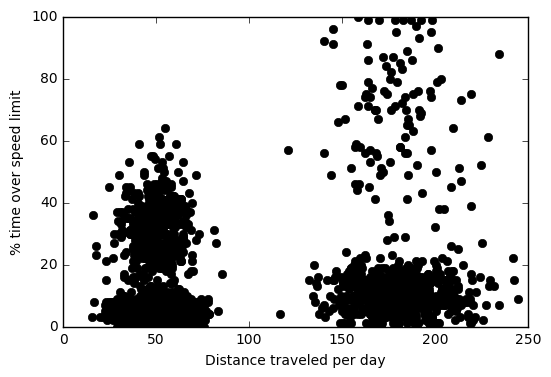

In [11]:
plt.plot(data.Distance_Feature.values, data.Speeding_Feature.values, 'ko')
plt.ylabel('% time over speed limit')
plt.xlabel ('Distance traveled per day')
plt.show()

In [28]:
from sklearn.cluster import KMeans


X= np.matrix(data[['Distance_Feature', 'Speeding_Feature']].values)
kmeans = KMeans(n_clusters=2).fit(X)

In [42]:
data['labels_K2']=kmeans.labels_


In [43]:
data.head()

,Driver_ID,Distance_Feature,Speeding_Feature,labels_K2
0,3423311935,71.24,28.0,0
1,3423313212,52.53,25.0,0
2,3423313724,64.54,27.0,0
3,3423311373,55.69,22.0,0
4,3423310999,54.58,25.0,0


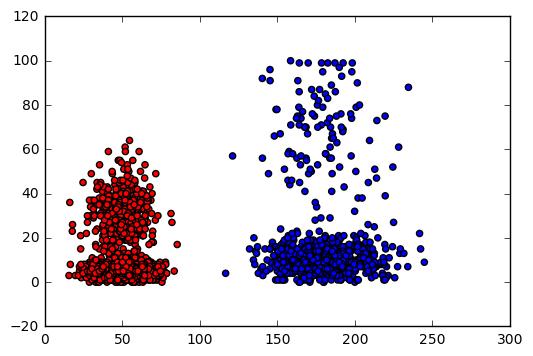

In [52]:
x= data.Distance_Feature.values
y = data.Speeding_Feature.values
labels = kmeans.labels_
colors = ['red', 'blue']

plt.scatter(x,y, c=labels, cmap= matplotlib.colors.ListedColormap(colors))
plt.show()

Let's tr with K = 4

In [53]:
kmeans_4 = KMeans(n_clusters= 4).fit(X)

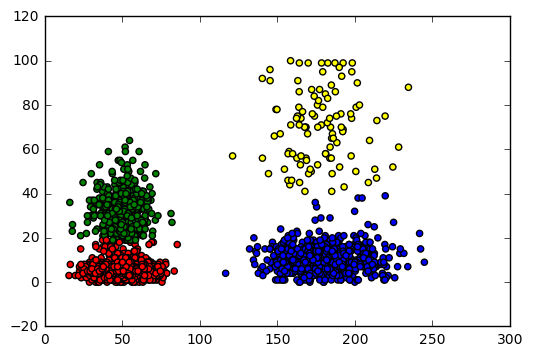

In [55]:
x= data.Distance_Feature.values
y = data.Speeding_Feature.values
labels = kmeans_4.labels_
colors = ['red', 'blue', 'green', 'yellow']

plt.scatter(x,y, c=labels, cmap= matplotlib.colors.ListedColormap(colors))
plt.show()

In [57]:
kmeans_3 = KMeans(n_clusters=3).fit(X)
kmeans_5 = KMeans(n_clusters=5).fit(X)

In [63]:
from sklearn import cluster

Results: There are clearly two main clusters looking at the mean distance traveled per day, possibly the ine that travels less refers to urban drivers, the one with more distance to rural drivers. This is also indicated because more agressive drivers cant travel 100% tmie above speed limit in a city. There are traffic lights and traffic. Rural areas that is easier, plus there is less law enforcment control. 